# **PROYECTO FINAL - AUTÓMATAS Y LENGUAJES FORMALES**

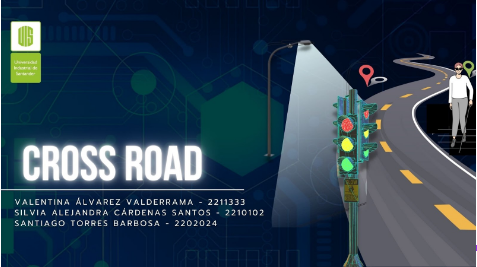     

Integrantes:


Valentina Álvarez Valderrama - 2211333


Silvia Alejandra Cárdenas Santos - 2210102


Santiago Torres Barbosa - 2202024


Profesor: Luis Carlos Guayacán Chaparro

Escuela de ingeniería de Sistemas e Informática

Universidad Industrial de Santander

Febrero 2023


# **INTRODUCCIÓN**


CROSS ROAD o en español cruce de caminos(cebras peatonales), es un proyecto novedoso que consiste en orientar y advertir a los peatones a la hora de cruzar un semáforo, todo esto se logra mediante el uso un sensor que de señales a los componentes visuales y auditivos del modelo que faciliten el entendimiento y reacción del transeúnte.
Para la implementación del proyecto se usó Google Collaboratory y fue elaborado con la teoría de máquinas de Turing.
Cross Road funciona de la siguiente manera. Se recibe una señal desde un sensor ubicado cerca del semáforo, esté aporta la información para saber en qué nivel de tránsito se encuentra en ese momento, es interpretada por la máquina de Turing como 0 o 1 dependiendo de la cantidad de vehículos, siendo 0 como "sin tráfico"  lo que permite que en los cruces peatonales no se enciendan ningún tipo de alarma o advertencia, y 1 como "bastante tráfico" lo cual procedería a encender el sensor, y activar las luces de peligro en la cebra peatonal, y de igual manera para las personas con discapacidad visual y auditiva, se activaría un alarma el cual emitirá un sonido relacionado a peligro .
Se considera que la implementación debería hacerse en un semáforo de prioridad, es decir, en calles con mayor flujo de vehículos y/o en lugares donde su uso tenga más valor.



# **DEFINICIÓN FORMAL**

Estados del autómata: 


**Q** = {q0,q1,q2,q3}


Estado inicial = q0


Estado final:


**F** = {q3}


Alfabeto de entrada:


**Σ** = {1,0}


Alfabeto de cinta:


**Γ** = {' ',0,1,’V’,’E’}


Símbolo de espacio en blanco:


**B** = ‘ ’


Funciones de transición: 


**δ(q0,0)** = (q1,’V’, →)


**δ(q0,1)** = (q1,’E’, →)


**δ(q1,0)** = (q1,’V’, →)


**δ(q1,1)** = (q1,’E’, →)


**δ(q1,’’)** = (q2,’’,  ←)


**δ(q2,’V’)** = (q2,’’,  ←)


**δ(q2,’E’)** = (q2,’’,  ←)


**δ(q2,’’)** = (q3,’’,  →)


# **SIMULACIÓN**


Palabra: B110B




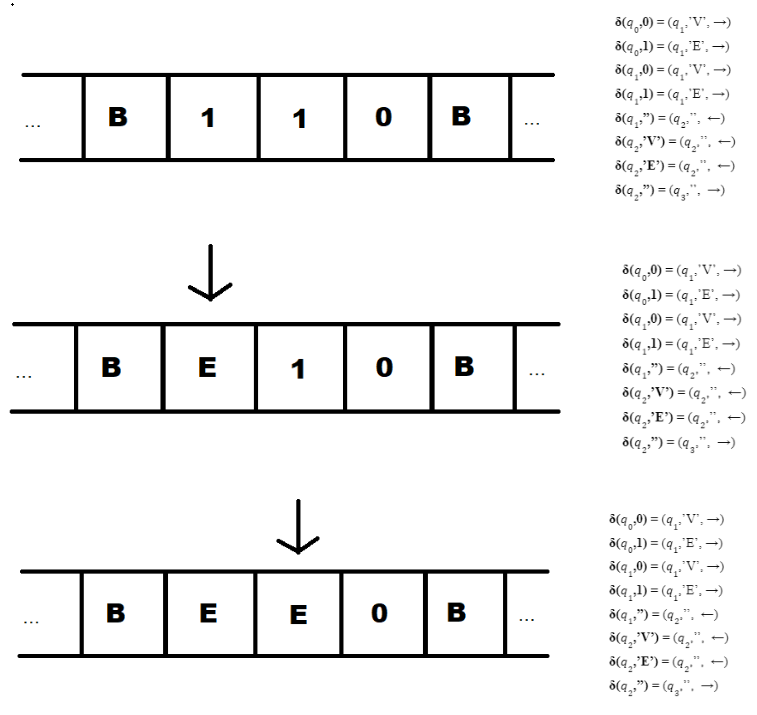

In [ ]:
display(Image('Simulacion/1.PNG'))

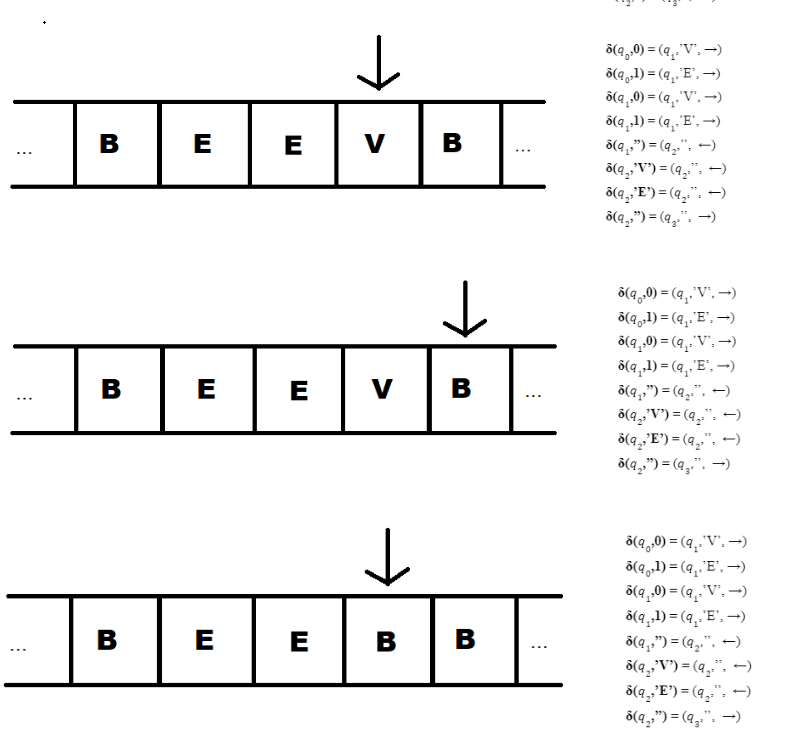

In [ ]:
display(Image('Simulacion/2.PNG'))

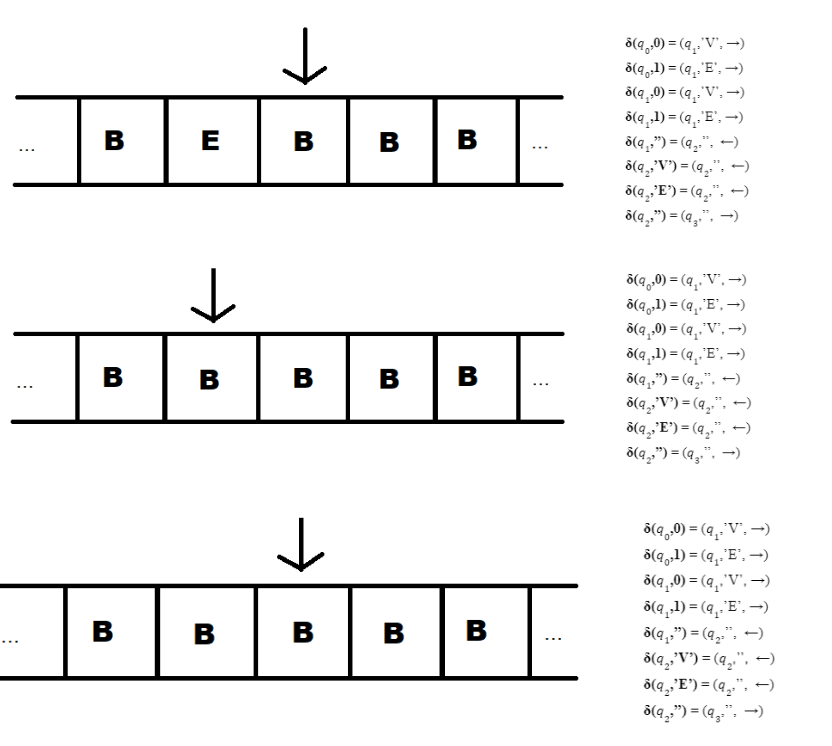

In [ ]:
display(Image('Simulacion/3.PNG'))

# **FUNCIONAMIENTO**

El sistema de Cross Road opera con un modelo de sensor que está implementado en las vías de tránsito; cuya funcionalidad se rige bajo una representación de números binarios aplicado a una cinta utilizando Máquinas de Turing, para la cual se recibe una entrada de 0’s o 1’s. Siendo de esta forma el 0 la lectura de una situación en la que no hay ninguna presencia vehícular, mientras que el 1 simboliza la detección de un cambio en el entorno, significando una movilidad existente en el tráfico. 

A su vez, tanto en el diagrama como en el código correspondiente, se manejan dos símbolos fundamentales dentro del alfabeto de la cinta, los cuales controlan los estados encargados de regular la circulación de peatones: ‘V’ define la activación en color verde del sistema de luces integrado en los cruces y ‘E’ define la activación de las luces de color rojo indicando que por el momento no se permite el paso de peatones. Cabe resaltar, que la activación de luces también va a estar conectada con el sistema de alarmas dependiente al estado leído, para que sea apto a todas las personas en el medio.

De este modo, aplicado a un escenario de la vida real el sensor no va a dejar de recibir entradas binarias, por tanto, la lectura se haría un infinito número de veces, sin llegar a un estado vacío tipo blank. 

# **DIAGRAMA DE ESTADOS:**


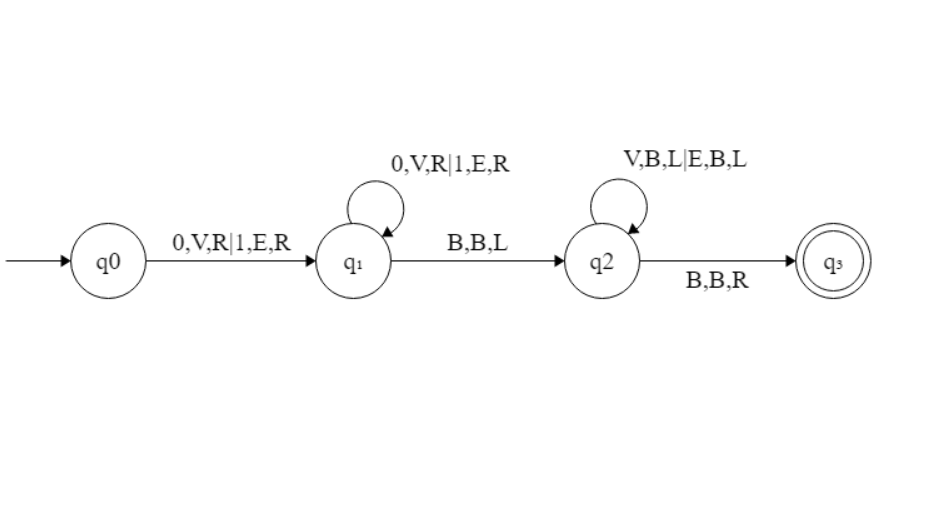

In [ ]:
display(Image('A/Captura.PNG'))

# A continuación el autómata en código:

In [ ]:
!pip install automata-lib==1.0.0.post4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for automata-lib: filename=automata_lib-1.0.0.post4-py3-none-any.whl size=13312 sha256=d8bee72945d03413a38fc37fa0557018afcac521fa5ade3d433a6417069f1046
  Stored in directory: /root/.cache/pip/wheels/1e/c8/4d/67f1b65f6f5d2856c2256a8358f6ebe45c9167dd1254828589
Successfully built automata-lib


In [ ]:
def ProyectoFinal():
    from automata.tm.dtm import DTM
    Sensor = DTM(
    states = {'q0', 'q1', 'q2','q3'},
    input_symbols = {'0', '1'},
    tape_symbols={'B','V','E','0', '1'}, 
    transitions = {
            'q0': {
                '0': ('q1', 'V', 'R'),
                '1': ('q1', 'E', 'R')
            },
            'q1': {
                '0': ('q1', 'V', 'R'),
                '1': ('q1', 'E', 'R'),
                'B': ('q2','B','L')
            },
            'q2': {
                'V': ('q2','B','L'),
                'E': ('q2','B','L'),
                'B': ('q3','B','R')
            }
         },
         initial_state='q0',
         blank_symbol='B',
         final_states={'q3'}
    )
    return Sensor


In [ ]:
def Validador():
    result = ProyectoFinal()
    def checker(string,Sensor):
        try:
            Sensor.validate_input(string, step=False)
            return True
        except Exception as e:
            print("Testeando...")
            return False
    
    valid_words = ['1110001',
                    '00001',
                    '10101',
                    '000000',
                    '11',
                    '0101011100']

    invalid_words = ['','V110','1010101V',
                   '101011E','E','1111E',
                    '000010v', '1010E',
                    '11001100VE', 'VEVE']

    for i in valid_words:
        if checker(i,result) != True:
            return False
    for j in invalid_words:
        if checker(j,result) != False:
            return False
    return True

if Validador() == True:
  print("Entrada de cinta correcta!")
else:
  print("No cumple las condiciones")

Testeando...
Testeando...
Testeando...
Testeando...
Testeando...
Testeando...
Testeando...
Testeando...
Testeando...
Testeando...
Entrada de cinta correcta!
